In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv('nft_collections.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40815 entries, 0 to 40814
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_volume   40815 non-null  float64
 1   total_sales    40815 non-null  float64
 2   total_supply   40815 non-null  float64
 3   num_owners     40815 non-null  int64  
 4   average_price  40815 non-null  float64
 5   num_reports    40815 non-null  int64  
 6   market_cap     40815 non-null  float64
 7   floor_price    40815 non-null  float64
 8   category       40815 non-null  object 
 9   qtd_traits     40815 non-null  int64  
 10  qtd_editors    40815 non-null  int64  
 11  target         40815 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.7+ MB


In [10]:
# Remover a coluna 'target' e definir X e y
X = df.drop(columns=['category', 'target'])
y = df['category']

# Divisão treino-teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Padronizar atributos (necessário para SVM e KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🔍 Relatório de Classificação - KNN
                     precision    recall  f1-score   support

                art      0.567     0.771     0.654      3814
       domain-names      0.000     0.000     0.000        30
             gaming      0.158     0.040     0.064       452
        memberships      0.229     0.092     0.131       510
              music      0.300     0.049     0.085       122
               pfps      0.577     0.534     0.555      2766
        photography      0.204     0.039     0.066       281
sports-collectibles      0.000     0.000     0.000        40
     virtual-worlds      0.000     0.000     0.000       148

           accuracy                          0.552      8163
          macro avg      0.226     0.170     0.173      8163
       weighted avg      0.495     0.552     0.509      8163



<Figure size 800x600 with 0 Axes>

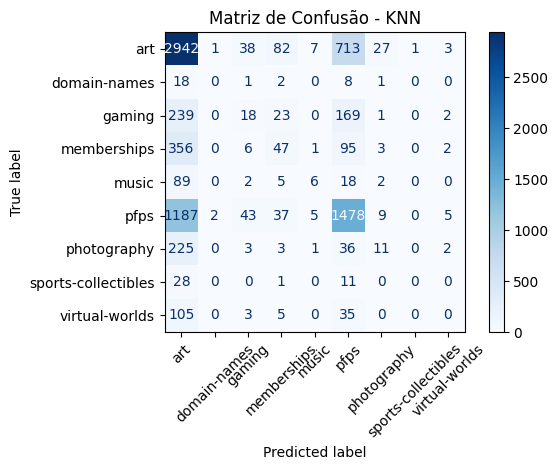

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
knn_pred = model.predict(X_test_scaled)

# Relatório
print("🔍 Relatório de Classificação - KNN")
print(classification_report(y_test, knn_pred, digits=3, zero_division=0))

# Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, knn_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Matriz de Confusão - KNN')
plt.grid(False)
plt.tight_layout()
plt.show()


🔍 Relatório de Classificação - Random Forest
                     precision    recall  f1-score   support

                art      0.583     0.795     0.673      3814
       domain-names      0.000     0.000     0.000        30
             gaming      0.306     0.033     0.060       452
        memberships      0.297     0.075     0.119       510
              music      0.269     0.057     0.095       122
               pfps      0.632     0.593     0.611      2766
        photography      0.271     0.103     0.149       281
sports-collectibles      0.000     0.000     0.000        40
     virtual-worlds      0.000     0.000     0.000       148

           accuracy                          0.583      8163
          macro avg      0.262     0.184     0.190      8163
       weighted avg      0.535     0.583     0.539      8163



<Figure size 800x600 with 0 Axes>

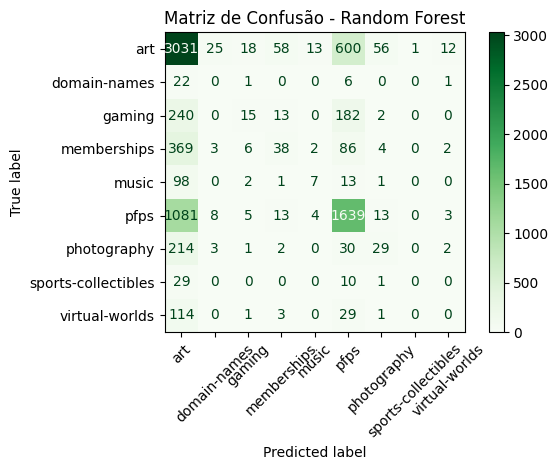

In [18]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

# Relatório
print("🔍 Relatório de Classificação - Random Forest")
print(classification_report(y_test, rf_pred, digits=3, zero_division=0))

# Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.tight_layout()
plt.show()



🏁 Treinando SVM com kernel = 'linear'
🔍 Relatório de Classificação - SVM (linear)
                     precision    recall  f1-score   support

                art      0.373     0.047     0.084      3814
       domain-names      0.034     0.133     0.054        30
             gaming      0.148     0.080     0.104       452
        memberships      0.141     0.041     0.064       510
              music      0.032     0.156     0.052       122
               pfps      0.710     0.181     0.288      2766
        photography      0.046     0.879     0.088       281
sports-collectibles      0.002     0.025     0.004        40
     virtual-worlds      0.000     0.000     0.000       148

           accuracy                          0.123      8163
          macro avg      0.165     0.171     0.082      8163
       weighted avg      0.434     0.123     0.151      8163



<Figure size 800x600 with 0 Axes>

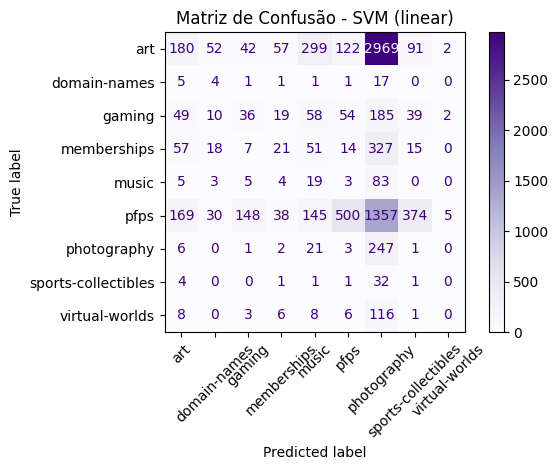


🏁 Treinando SVM com kernel = 'poly'
🔍 Relatório de Classificação - SVM (poly)
                     precision    recall  f1-score   support

                art      0.512     0.006     0.011      3814
       domain-names      0.083     0.067     0.074        30
             gaming      0.289     0.029     0.052       452
        memberships      0.143     0.002     0.004       510
              music      0.000     0.000     0.000       122
               pfps      0.797     0.021     0.042      2766
        photography      0.035     1.000     0.068       281
sports-collectibles      0.000     0.000     0.000        40
     virtual-worlds      0.167     0.007     0.013       148

           accuracy                          0.046      8163
          macro avg      0.225     0.126     0.029      8163
       weighted avg      0.539     0.046     0.025      8163



<Figure size 800x600 with 0 Axes>

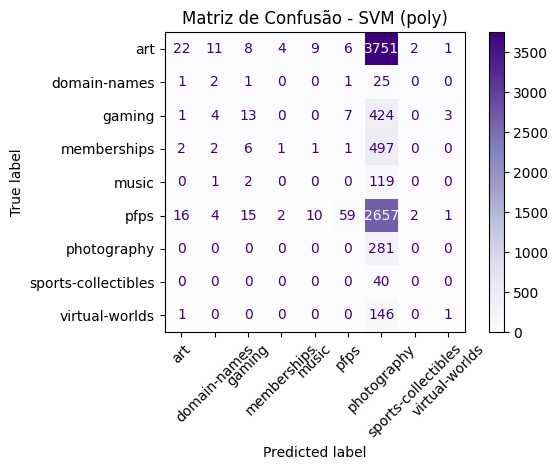


🏁 Treinando SVM com kernel = 'rbf'
🔍 Relatório de Classificação - SVM (rbf)
                     precision    recall  f1-score   support

                art      0.608     0.568     0.588      3814
       domain-names      0.014     0.067     0.023        30
             gaming      0.119     0.113     0.116       452
        memberships      0.145     0.035     0.057       510
              music      0.032     0.156     0.054       122
               pfps      0.664     0.379     0.483      2766
        photography      0.048     0.288     0.082       281
sports-collectibles      0.025     0.025     0.025        40
     virtual-worlds      0.000     0.000     0.000       148

           accuracy                          0.415      8163
          macro avg      0.184     0.181     0.159      8163
       weighted avg      0.527     0.415     0.452      8163



<Figure size 800x600 with 0 Axes>

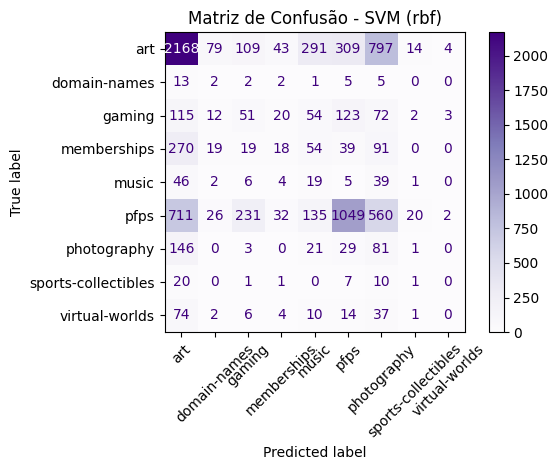

In [19]:
svm_kernels = ["linear", "poly", "rbf"]
svm_preds = {}

for kernel in svm_kernels:
    print(f"\n🏁 Treinando SVM com kernel = '{kernel}'")
    model = SVC(kernel=kernel, class_weight='balanced', probability=True, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    svm_preds[kernel] = y_pred

    # Relatório
    print(f"🔍 Relatório de Classificação - SVM ({kernel})")
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))

    # Matriz de confusão
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Purples', xticks_rotation=45)
    plt.title(f'Matriz de Confusão - SVM ({kernel})')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


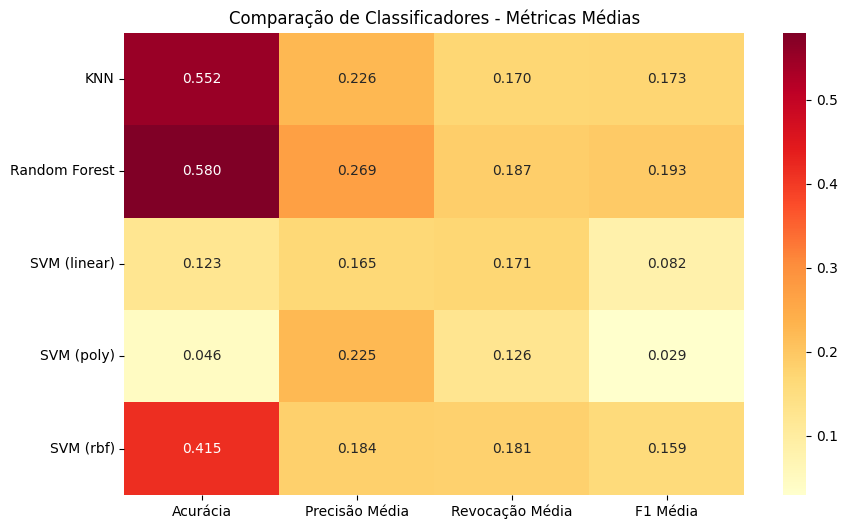

In [14]:
from sklearn.metrics import classification_report

# Função auxiliar para gerar resumo de métricas
def get_metrics_summary(name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        'Acurácia': report['accuracy'],
        'Precisão Média': np.mean([v['precision'] for k, v in report.items() if k in y.unique()]),
        'Revocação Média': np.mean([v['recall'] for k, v in report.items() if k in y.unique()]),
        'F1 Média': np.mean([v['f1-score'] for k, v in report.items() if k in y.unique()])
    }

# Executar para cada modelo
metrics_summary = pd.DataFrame([
    get_metrics_summary("KNN", y_test, KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train).predict(X_test_scaled)),
    get_metrics_summary("Random Forest", y_test, RandomForestClassifier(n_estimators=100, class_weight='balanced').fit(X_train, y_train).predict(X_test)),
    get_metrics_summary("SVM (linear)", y_test, SVC(kernel='linear', class_weight='balanced').fit(X_train_scaled, y_train).predict(X_test_scaled)),
    get_metrics_summary("SVM (poly)", y_test, SVC(kernel='poly', class_weight='balanced').fit(X_train_scaled, y_train).predict(X_test_scaled)),
    get_metrics_summary("SVM (rbf)", y_test, SVC(kernel='rbf', class_weight='balanced').fit(X_train_scaled, y_train).predict(X_test_scaled)),
], index=["KNN", "Random Forest", "SVM (linear)", "SVM (poly)", "SVM (rbf)"])

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_summary, annot=True, fmt=".3f", cmap="YlOrRd")
plt.title("Comparação de Classificadores - Métricas Médias")
plt.show()


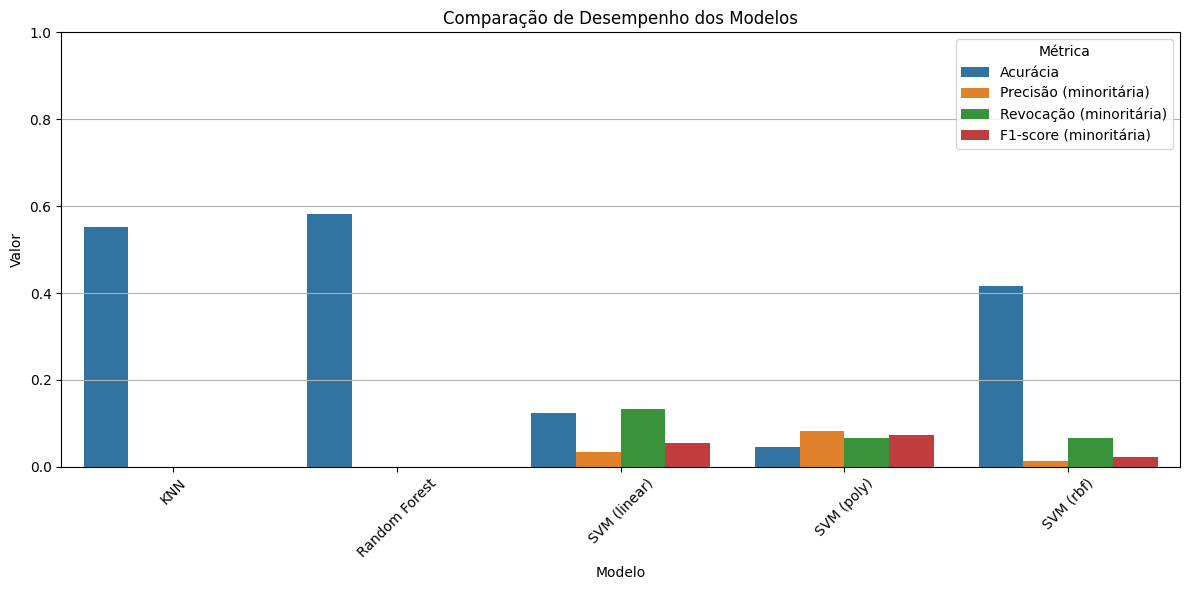

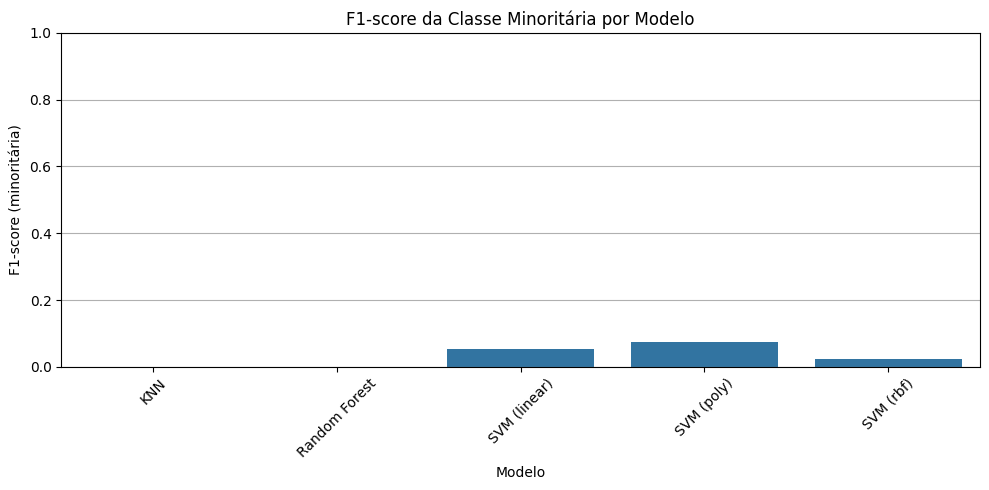

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Exemplo: Pegue os reports diretamente do seu código
# Substitua esses 'classification_report' pelos dicionários que você extraiu dos modelos
reports = {
    "KNN": classification_report(y_test, knn_pred, output_dict=True, zero_division=0),
    "Random Forest": classification_report(y_test, rf_pred, output_dict=True, zero_division=0),
    "SVM (linear)": classification_report(y_test, svm_preds["linear"], output_dict=True, zero_division=0),
    "SVM (poly)": classification_report(y_test, svm_preds["poly"], output_dict=True, zero_division=0),
    "SVM (rbf)": classification_report(y_test, svm_preds["rbf"], output_dict=True, zero_division=0)
}

# Descobrir qual é a classe minoritária
from collections import Counter
minor_class = Counter(y_train).most_common()[-1][0]  # a menos frequente

# Preparar dataframe com as métricas
metrics_data = []
for model_name, report in reports.items():
    metrics_data.append({
        "Modelo": model_name,
        "Acurácia": report["accuracy"],
        "Precisão (minoritária)": report[str(minor_class)]["precision"],
        "Revocação (minoritária)": report[str(minor_class)]["recall"],
        "F1-score (minoritária)": report[str(minor_class)]["f1-score"],
    })

df_metrics = pd.DataFrame(metrics_data)

# Gráfico comparando todas as métricas
plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor'),
            x='Modelo', y='Valor', hue='Métrica')
plt.title('Comparação de Desempenho dos Modelos')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico específico para F1 da classe minoritária
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='F1-score (minoritária)', data=df_metrics)
plt.title('F1-score da Classe Minoritária por Modelo')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


